In [1]:
import NO_utils_multiple
import NO_utils
import os
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import random
from datetime import datetime

## Load and visualize data

data\set 1
Data loaded in 367.75 seconds.
Spatial waves shape: (600, 325, 32, 32)
n_designs: 600, n_panes: 3, design_res: 32, d_design: 2, dispersion_bands: 6, rng_seed_offset: [[0.]]
EIGENVALUE_DATA shape: (600, 325, 6)
EIGENVECTOR_DATA shape: (600, 325, 6, 2048)
EIGENVECTOR_DATA_x shape: (600, 325, 6, 32, 32)
EIGENVECTOR_DATA_y shape: (600, 325, 6, 32, 32)
WAVEVECTOR_DATA shape: (600, 325, 2)
WAVEFORM_DATA shape: (600, 325, 32, 32)
designs shape: (600, 3, 32, 32)
design_params shape: (1, 6)
const shape: {'E_max': (1, 1), 'E_min': (1, 1), 'N_eig': (1, 1), 'N_ele': (1, 1), 'N_pix': (1, 1), 'N_wv': (2, 1), 'a': (1, 1), 'design': (3, 32, 32), 'design_scale': (6, 1), 'isSaveEigenvectors': (1, 1), 'isUseGPU': (1, 1), 'isUseImprovement': (1, 1), 'isUseParallel': (1, 1), 'isUseSecondImprovement': (1, 1), 'poisson_max': (1, 1), 'poisson_min': (1, 1), 'rho_max': (1, 1), 'rho_min': (1, 1), 'sigma_eig': (1, 1), 'symmetry_type': (4, 1), 't': (1, 1), 'wavevectors': (2, 325)}


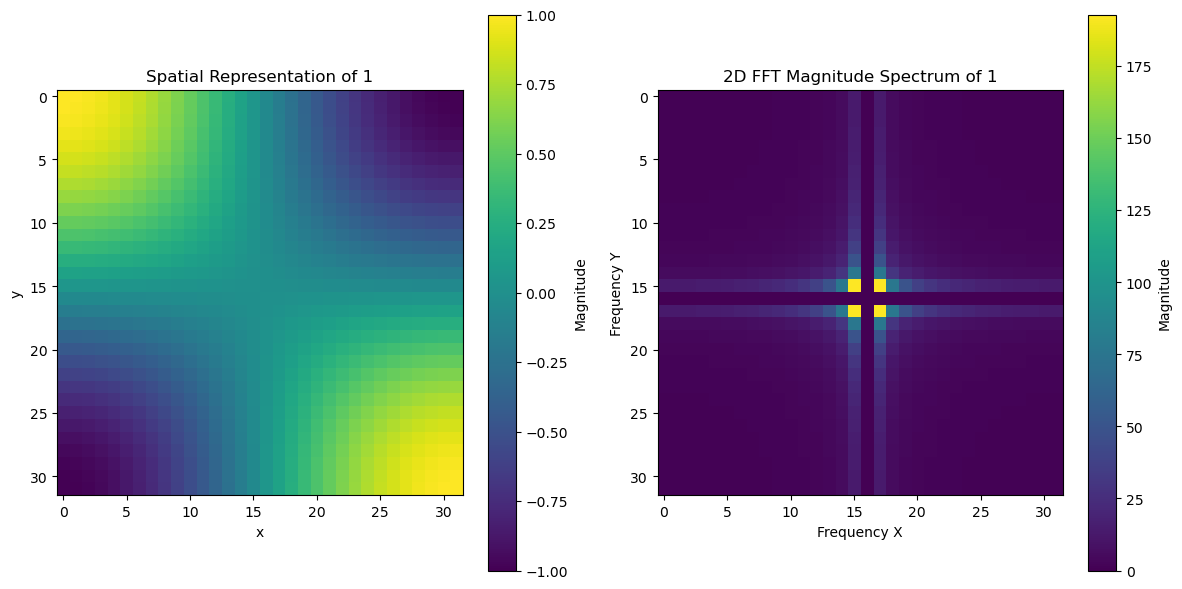

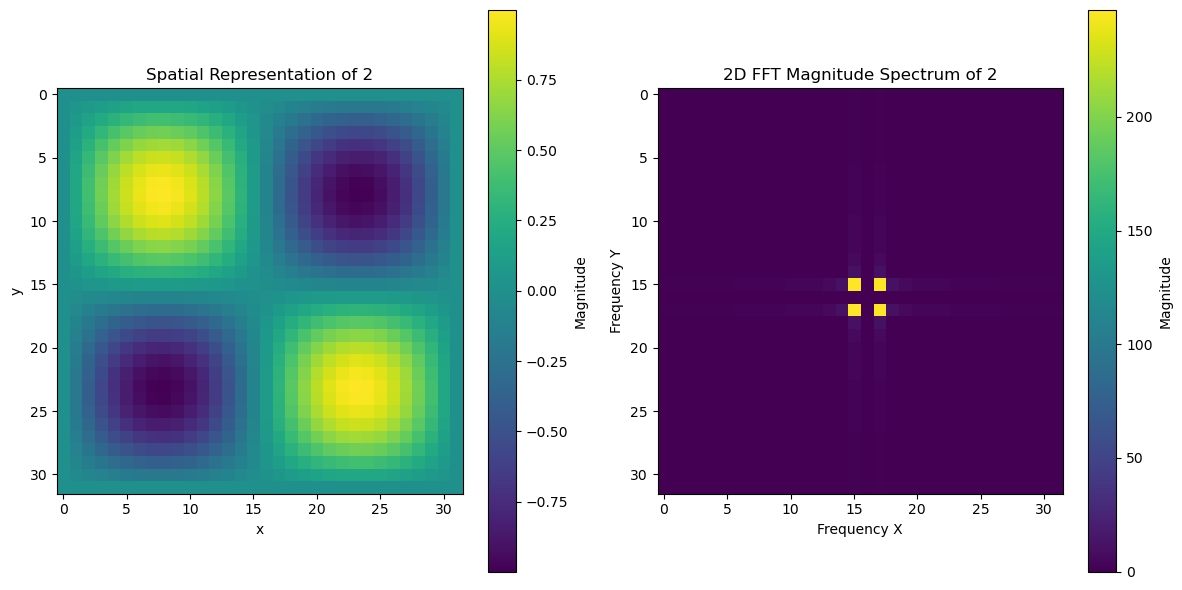

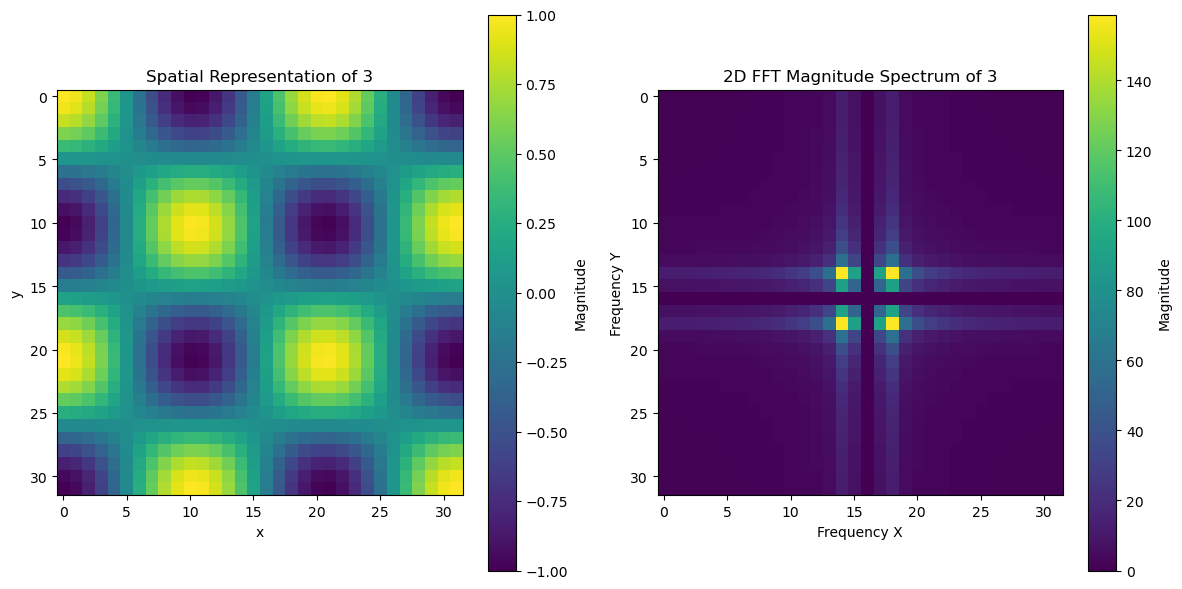

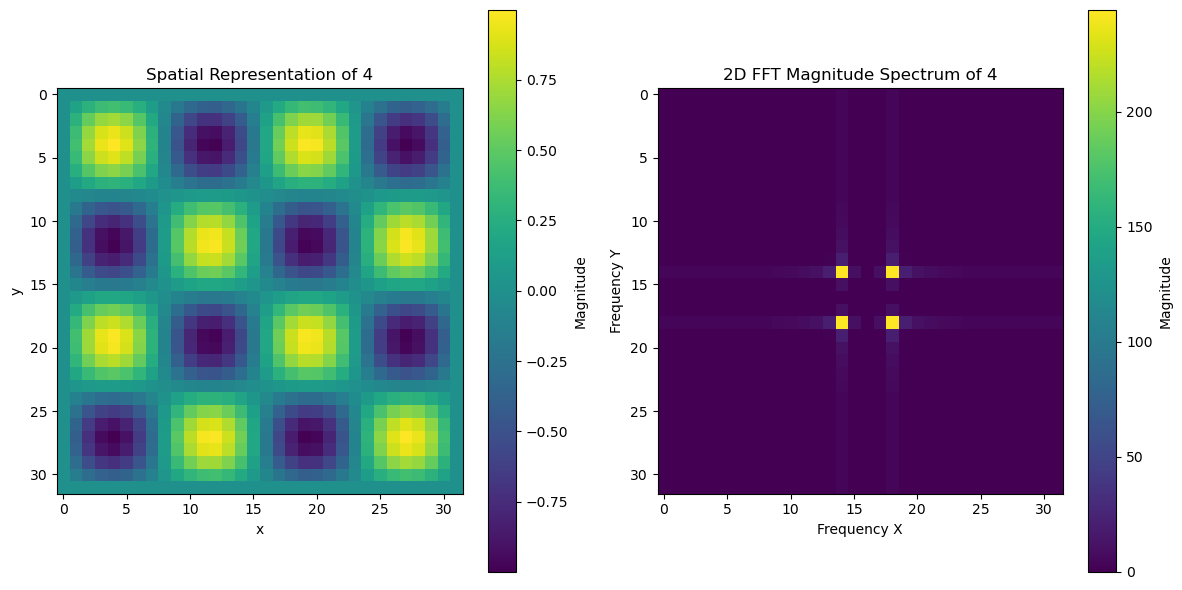

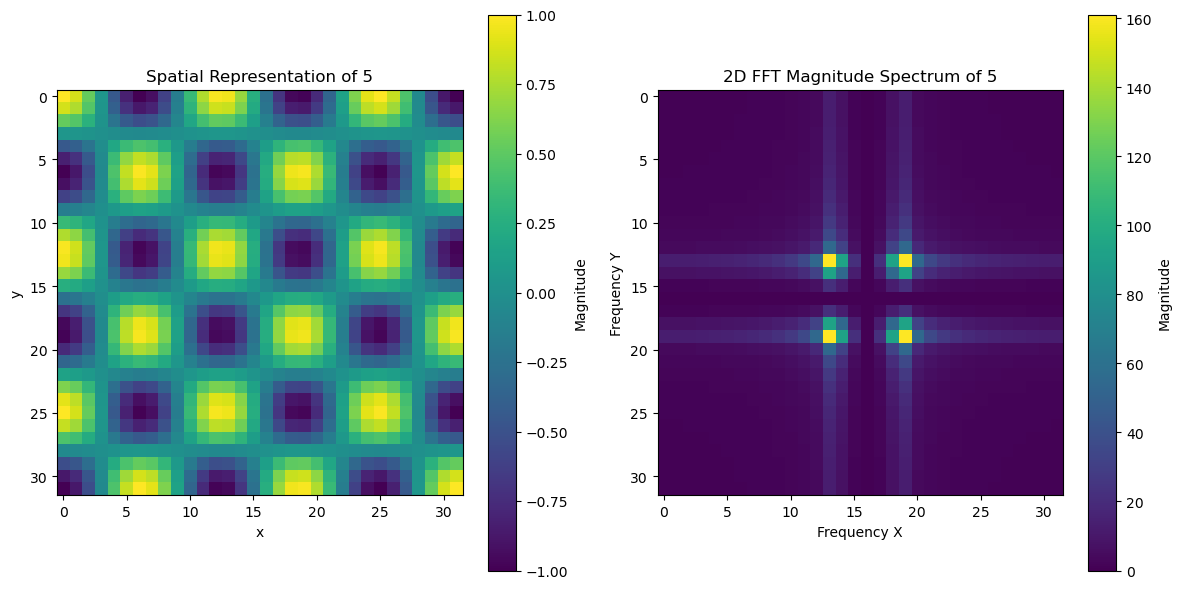

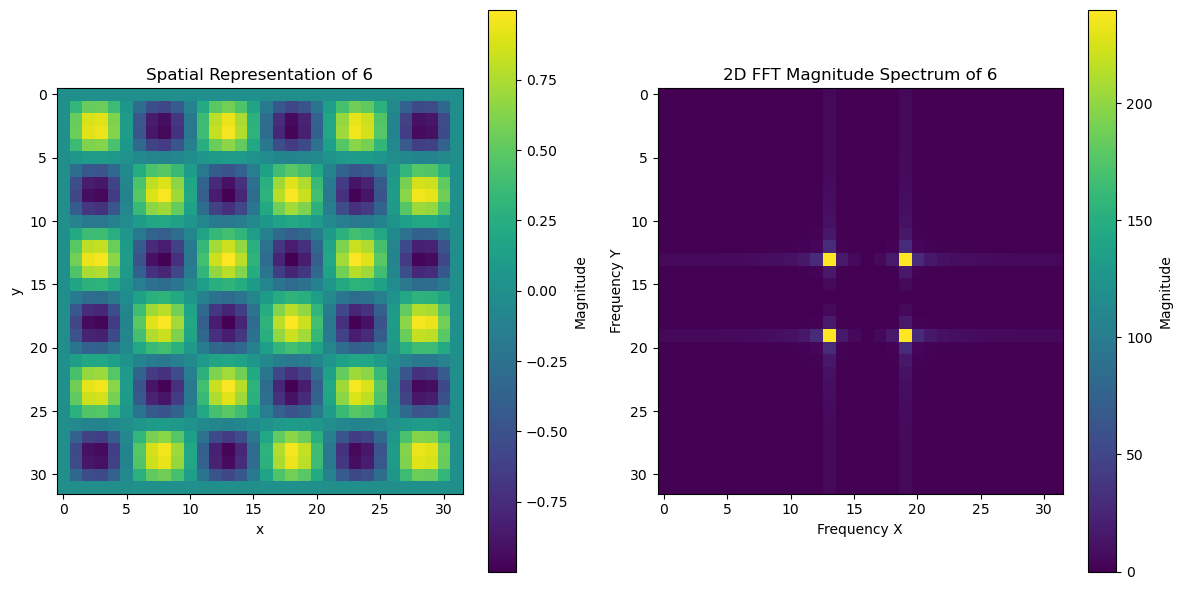

In [2]:
# Load and extract data
# datafolder_name = ["OUTPUT", "discrete_symmetric_p32_n800_rs400"]
datafolder_name = ["data", "set 1"]
data_path = os.path.join(*datafolder_name)
print(data_path)

designs, design_params, n_designs, n_panes, design_res, WAVEVECTOR_DATA, WAVEFORM_DATA, n_dim, n_wavevectors, EIGENVALUE_DATA, n_bands, EIGENVECTOR_DATA_x, EIGENVECTOR_DATA_y, const, N_struct, imag_tol, rng_seed_offset = NO_utils.extract_data(data_path)

#Convert all bands to spatial domain
bands = np.arange(1, n_bands + 1)
bands_fft = np.zeros((n_bands, design_res, design_res))
for i, band in enumerate(bands):
    bands_fft[i], _ = NO_utils_multiple.const_to_spatial(band, design_res, plot_result=True, scaling_factor=1.0)

#Take unique subset of waveforms    
waveforms = WAVEFORM_DATA[0]

In [3]:
# Print the max and min values of all the arrays with a size of 400 in its first dimension.

print(f'Max value of designs: {np.max(designs)}')
print(f'Min value of designs: {np.min(designs)}')
print(f'Max value of WAVEFORM_DATA: {np.max(WAVEFORM_DATA)}')
print(f'Min value of WAVEFORM_DATA: {np.min(WAVEFORM_DATA)}')
print(f'Max value of WAVEVECTOR_DATA_x: {np.max(EIGENVECTOR_DATA_x)}')
print(f'Min value of WAVEVECTOR_DATA_x: {np.min(EIGENVECTOR_DATA_x)}')
print(f'Max value of WAVEVECTOR_DATA_y: {np.max(EIGENVECTOR_DATA_y)}')
print(f'Min value of WAVEVECTOR_DATA_y: {np.min(EIGENVECTOR_DATA_y)}')

# Flatten the arrays and plot a separate histogram showing the distribution of values for each array with a size of 400 in its first dimension. Drop any imaginary components for the eigenvectors.

# Flatten the arrays
designs_flat = designs.flatten()
WAVEFORM_DATA_flat = WAVEFORM_DATA.flatten()
EIGENVECTOR_DATA_x_flat = EIGENVECTOR_DATA_x.flatten()
EIGENVECTOR_DATA_y_flat = EIGENVECTOR_DATA_y.flatten()

# Take the symlog of the flattened arrays. Take the real value for complex valued arrays.
# designs_flat_symlog = np.sign(designs_flat) * np.log10(np.abs(designs_flat) + 1)
# WAVEFORM_DATA_flat_symlog = np.sign(WAVEFORM_DATA_flat) * np.log10(np.abs(WAVEFORM_DATA_flat) + 1)
# EIGENVECTOR_DATA_x_flat_symlog = np.sign(EIGENVECTOR_DATA_x_flat.real) * np.log10(np.abs(EIGENVECTOR_DATA_x_flat.real) + 1)
# EIGENVECTOR_DATA_y_flat_symlog = np.sign(EIGENVECTOR_DATA_y_flat.real) * np.log10(np.abs(EIGENVECTOR_DATA_y_flat.real) + 1)

Max value of designs: 1.0
Min value of designs: 0.0
Max value of WAVEFORM_DATA: 1.0
Min value of WAVEFORM_DATA: -0.9999995318233016
Max value of WAVEVECTOR_DATA_x: (0.59423828125+0j)
Min value of WAVEVECTOR_DATA_x: (-0.685546875+0j)
Max value of WAVEVECTOR_DATA_y: (0.63818359375+0.1103515625j)
Min value of WAVEVECTOR_DATA_y: (-0.59228515625-0.0186614990234375j)


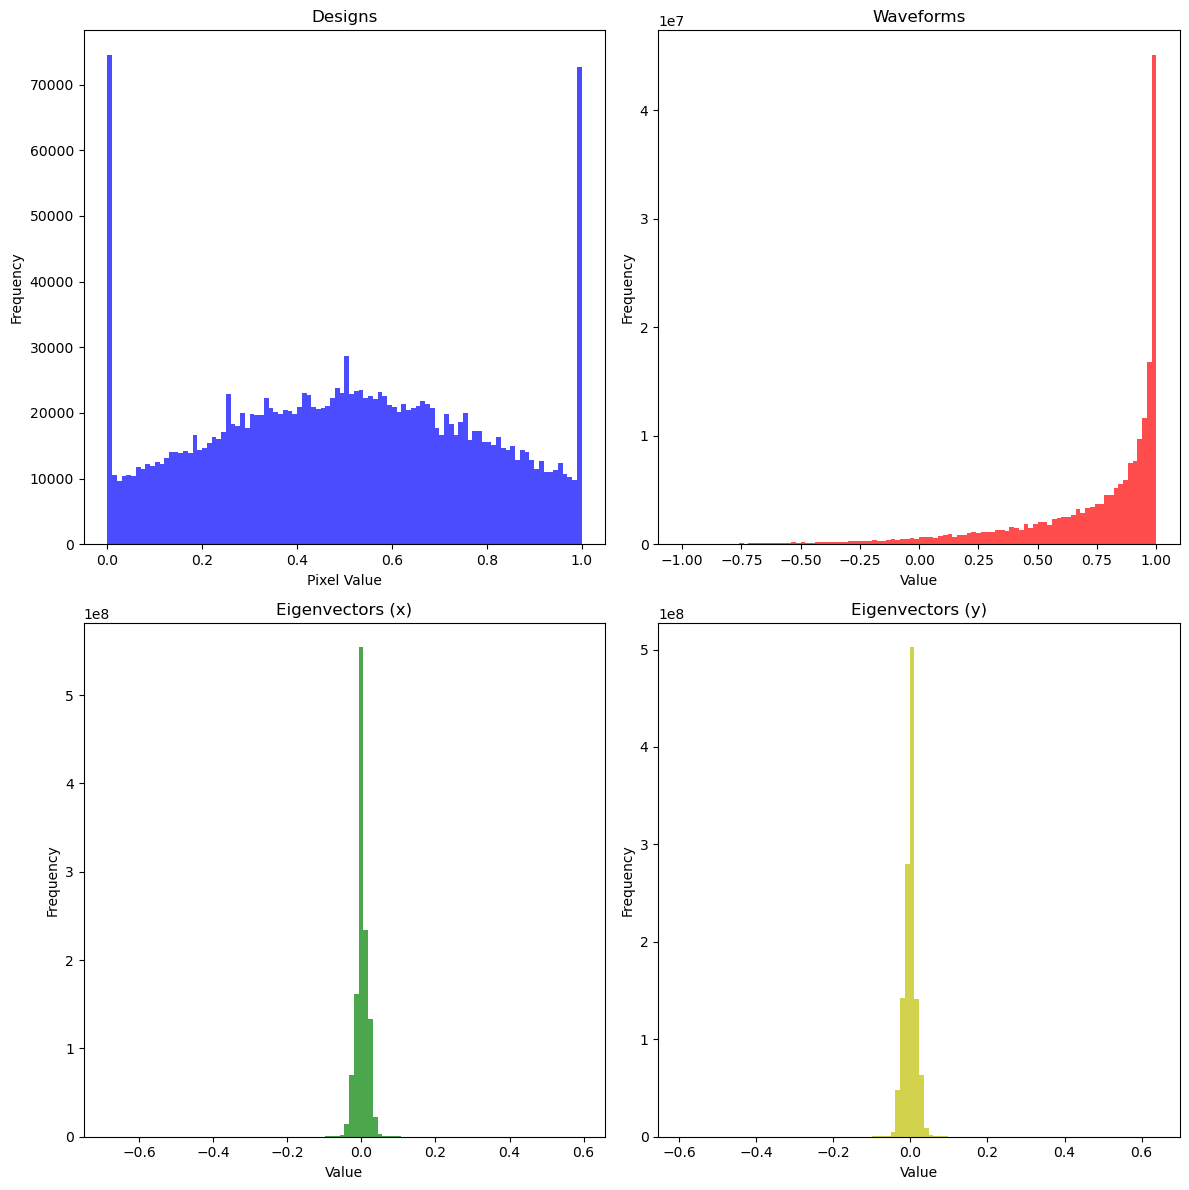

In [4]:
# Plot the histograms of flattened real values for each array
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].hist(designs_flat, bins=100, color='b', alpha=0.7)
axes[0, 0].set_title('Designs')
axes[0, 0].set_xlabel('Pixel Value')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(WAVEFORM_DATA_flat, bins=100, color='r', alpha=0.7)
axes[0, 1].set_title('Waveforms')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(EIGENVECTOR_DATA_x_flat.real, bins=100, color='g', alpha=0.7)
axes[1, 0].set_title('Eigenvectors (x)')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(EIGENVECTOR_DATA_y_flat.real, bins=100, color='y', alpha=0.7)
axes[1, 1].set_title('Eigenvectors (y)')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:
# Plot the histograms of flattened log abs values for each array
# fig, axes = plt.subplots(2, 2, figsize=(12, 12))
# 
# axes[0, 0].hist(designs_flat_symlog, bins=100, color='b', alpha=0.7)
# axes[0, 0].set_title('Designs')
# axes[0, 0].set_xlabel('Log Abs Value')
# axes[0, 0].set_ylabel('Frequency')
# 
# axes[0, 1].hist(WAVEFORM_DATA_flat_symlog, bins=100, color='r', alpha=0.7)
# axes[0, 1].set_title('Waveforms')
# axes[0, 1].set_xlabel('Log Abs Value')
# axes[0, 1].set_ylabel('Frequency')
# 
# axes[1, 0].hist(EIGENVECTOR_DATA_x_flat_symlog, bins=100, color='g', alpha=0.7)
# axes[1, 0].set_title('Eigenvectors (x)')
# axes[1, 0].set_xlabel('Log Abs Value')
# axes[1, 0].set_ylabel('Frequency')
# 
# axes[1, 1].hist(EIGENVECTOR_DATA_y_flat_symlog, bins=100, color='y', alpha=0.7)
# axes[1, 1].set_title('Eigenvectors (y)')
# axes[1, 1].set_xlabel('Log Abs Value')
# axes[1, 1].set_ylabel('Frequency')
# 
# plt.tight_layout()
# plt.show()

In [6]:
# Draw a random design and its corresponding eigenvectors
random_seed = 36
random.seed(random_seed)
sample_index = np.random.randint(0, n_designs)
sample_geometry = designs[sample_index, 0]
sample_band = np.random.randint(0, n_bands)
sample_wavevector = np.random.randint(0, n_wavevectors)
sample_waveform = WAVEFORM_DATA[sample_index, sample_wavevector]
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_wavevector}')

Design: 411, Band: 5, Wavevector: 124


designs shape: (600, 3, 32, 32)
WAVEFORM_DATA shape: (600, 325, 32, 32)
Average pixel values of all geometries: 0.5016087747076138
Average pixel values of all waveforms: 0.7354731009461464


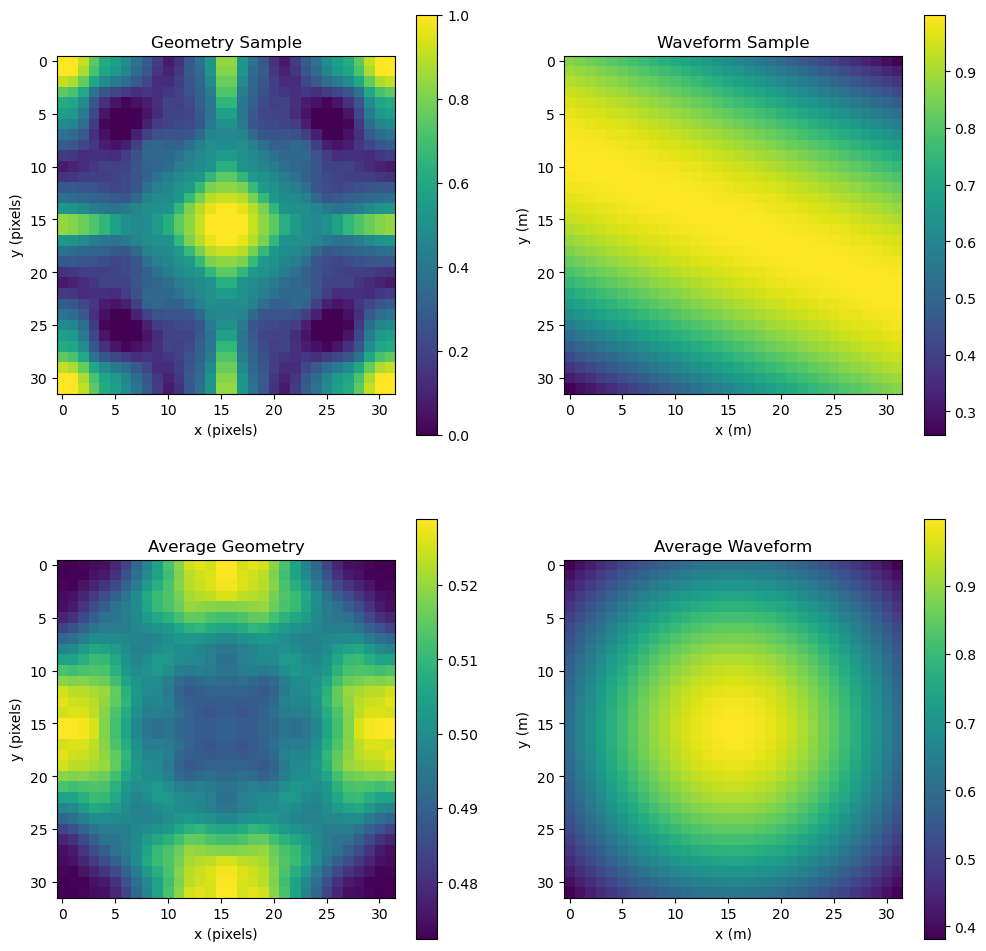

In [7]:
# Calculate the average values for geometry and waveform across all samples
print(f'designs shape: {designs.shape}')
print(f'WAVEFORM_DATA shape: {WAVEFORM_DATA.shape}')

avg_geometry = np.mean(designs[:, 0], axis=0)
avg_waveform = np.mean(WAVEFORM_DATA[0,:], axis=0)

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot the geometry sample on the top-left
im1 = axes[0, 0].imshow(sample_geometry, cmap='viridis')
axes[0, 0].set_title('Geometry Sample')
axes[0, 0].set_xlabel('x (pixels)')
axes[0, 0].set_ylabel('y (pixels)')
plt.colorbar(im1, ax=axes[0, 0])

# Plot the waveform sample on the top-right
im2 = axes[0, 1].imshow(sample_waveform, cmap='viridis')
axes[0, 1].set_title('Waveform Sample')
axes[0, 1].set_xlabel('x (m)')
axes[0, 1].set_ylabel('y (m)')
plt.colorbar(im2, ax=axes[0, 1])

# Plot the average geometry on the bottom-left
im3 = axes[1, 0].imshow(avg_geometry, cmap='viridis')
axes[1, 0].set_title('Average Geometry')
axes[1, 0].set_xlabel('x (pixels)')
axes[1, 0].set_ylabel('y (pixels)')
plt.colorbar(im3, ax=axes[1, 0])

# Plot the average waveform on the bottom-right
im4 = axes[1, 1].imshow(avg_waveform, cmap='viridis')
axes[1, 1].set_title('Average Waveform')
axes[1, 1].set_xlabel('x (m)')
axes[1, 1].set_ylabel('y (m)')
plt.colorbar(im4, ax=axes[1, 1])

print(f'Average pixel values of all geometries: {np.mean(designs[:,0])}')
print(f'Average pixel values of all waveforms: {np.mean(WAVEFORM_DATA[0,:])}')

Design: 411, Band: 5, Wavevector: 124


C:\Users\hz283\Documents\Duke\Research\NO-2D-Metamaterials\NO_utils.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


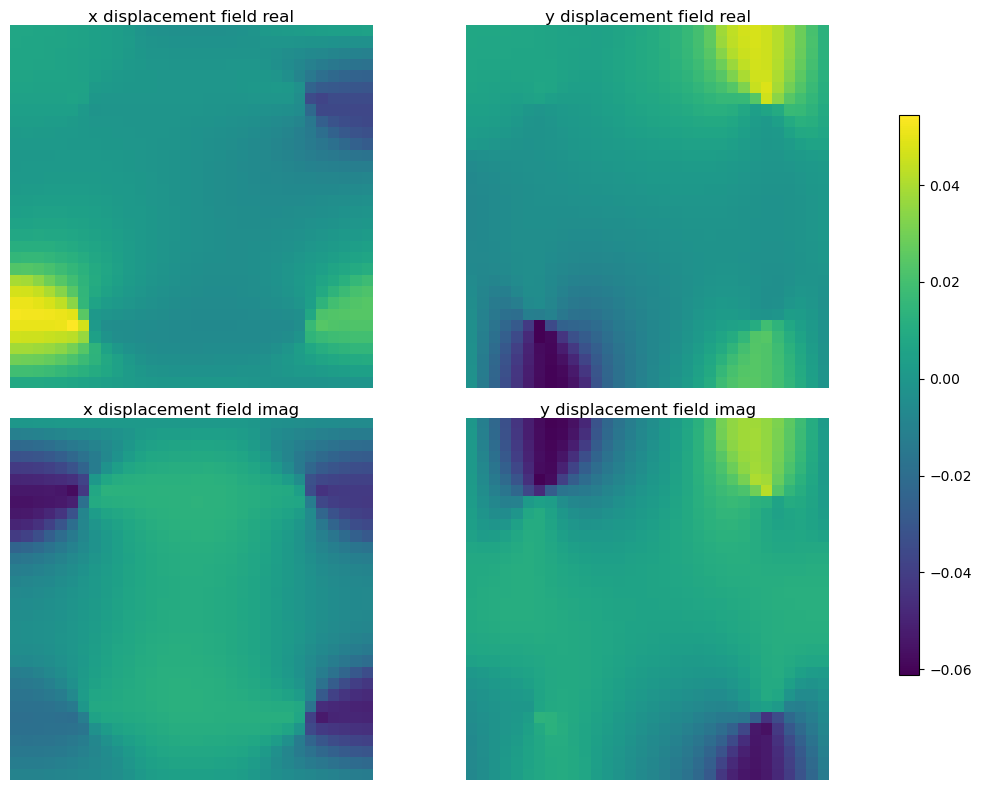

In [8]:
# View eigenvectors for the selected design, band, and wavevector
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_wavevector}')
sample_eigenvector_x = EIGENVECTOR_DATA_x[sample_index, sample_wavevector, sample_band]
sample_eigenvector_y = EIGENVECTOR_DATA_y[sample_index, sample_wavevector, sample_band]

NO_utils.plot_eigenvectors(sample_eigenvector_x, sample_eigenvector_y, unify_scales=True)

## Model architecture & training

In [9]:
# Import modules for building a neural operator model
import numpy as np
import scipy as sp
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.fft
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR

# Import specialized neural operator model tools
from neuralop.models import FNO, FNO2d, TFNO, TFNO2d
from neuralop import Trainer
from neuralop.training import CheckpointCallback
from neuralop.datasets import load_darcy_flow_small
from neuralop.utils import count_model_params
from neuralop.datasets import data_transforms
from neuralop import LpLoss, H1Loss

# For creating datasets and data loaders for training and evaluation
from torch.utils.data import DataLoader, Dataset, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler

# Optional: torchvision for augmentations and transformations (if working with image-like data)
import torchvision.transforms as transforms

# For plotting and visualization
import matplotlib.pyplot as plt

# Optional: Use tqdm for progress bars during training and evaluation
from tqdm import tqdm

# Optional: If you are working with graph data or architectures
# import torch_geometric

# If you need automatic differentiation for custom operations or gradients
from torch.autograd import Function

In [10]:
#Set the device for the neural operator model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using Device:', device)
print("Using PyTorch version:", torch.__version__)

Using Device: cuda
Using PyTorch version: 2.4.1+cu118


In [11]:
# Print the shape of the first input tensor for confirmation
print("Shape of the first input tensor to be assigned:")
print("designs[0, 0]:", designs[0, 0].shape)
print("WAVEFORM_DATA[0, 0]:", WAVEFORM_DATA[0, 0].shape)

# Print the shape of the first output tensor for confirmation
print("Shape of the first output tensor to be assigned:")
print("EIGENVECTOR_DATA_x[0, 0, 0]:", EIGENVECTOR_DATA_x[0, 0, 0].shape)
print("EIGENVECTOR_DATA_x[0, 0, 0]:", EIGENVECTOR_DATA_y[0, 0, 0].shape)

Shape of the first input tensor to be assigned:
designs[0, 0]: (32, 32)
WAVEFORM_DATA[0, 0]: (32, 32)
Shape of the first output tensor to be assigned:
EIGENVECTOR_DATA_x[0, 0, 0]: (32, 32)
EIGENVECTOR_DATA_x[0, 0, 0]: (32, 32)


In [12]:
def symlog_transform(x, linthresh=1):
    return np.sign(x) * np.log10(np.abs(x) + linthresh)

def symlog_inverse_transform(y, linthresh=1):
    return np.sign(y) * (10**np.abs(y) - linthresh)

# Function to fit and transform with StandardScaler, with optional symlog transformation
def standardize_array(array, symlog=False):
    scaler = StandardScaler()
    original_shape = array.shape
    array_flat = array.reshape(-1, 1)  # Flatten the array to 2D

    if symlog:
        array_flat = symlog_transform(array_flat)

    array_standardized = scaler.fit_transform(array_flat).reshape(original_shape)
    mean = scaler.mean_[0]
    scale = scaler.scale_[0]

    return array_standardized, mean, scale, symlog

In [13]:
# Standardizing EIGENVALUE_DATA and casting to float16
EIGENVALUE_DATA_standardized, eigenvalue_mean, eigenvalue_scale, _ = standardize_array(EIGENVALUE_DATA)
EIGENVALUE_DATA_standardized = EIGENVALUE_DATA_standardized.astype(np.float16)

# Standardizing EIGENVECTOR_DATA_x (real and imaginary parts separately) and casting to float16
EIGENVECTOR_x_r = EIGENVECTOR_DATA_x.real.astype(np.float16)
EIGENVECTOR_x_i = EIGENVECTOR_DATA_x.imag.astype(np.float16)

EIGENVECTOR_x_r_standardized, eigvector_x_r_mean, eigvector_x_r_scale, _ = standardize_array(EIGENVECTOR_x_r)
EIGENVECTOR_x_r_standardized = EIGENVECTOR_x_r_standardized.astype(np.float16)

EIGENVECTOR_x_i_standardized, eigvector_x_i_mean, eigvector_x_i_scale, _ = standardize_array(EIGENVECTOR_x_i)
EIGENVECTOR_x_i_standardized = EIGENVECTOR_x_i_standardized.astype(np.float16)

# Standardizing EIGENVECTOR_DATA_y (real and imaginary parts separately) and casting to float16
EIGENVECTOR_y_r = EIGENVECTOR_DATA_y.real.astype(np.float16)
EIGENVECTOR_y_i = EIGENVECTOR_DATA_y.imag.astype(np.float16)

EIGENVECTOR_y_r_standardized, eigvector_y_r_mean, eigvector_y_r_scale, _ = standardize_array(EIGENVECTOR_y_r)
EIGENVECTOR_y_r_standardized = EIGENVECTOR_y_r_standardized.astype(np.float16)

EIGENVECTOR_y_i_standardized, eigvector_y_i_mean, eigvector_y_i_scale, _ = standardize_array(EIGENVECTOR_y_i)
EIGENVECTOR_y_i_standardized = EIGENVECTOR_y_i_standardized.astype(np.float16)

# Standardizing WAVEVECTOR_DATA and casting to float16
WAVEVECTOR_DATA_standardized, wavevector_mean, wavevector_scale, _ = standardize_array(WAVEVECTOR_DATA)
WAVEVECTOR_DATA_standardized = WAVEVECTOR_DATA_standardized.astype(np.float16)

del EIGENVECTOR_DATA_x, EIGENVECTOR_DATA_y


In [14]:
# Print shapes and data types of arrays to verify
print("EIGENVALUE_DATA_standardized shape:", EIGENVALUE_DATA_standardized.shape, "dtype:", EIGENVALUE_DATA_standardized.dtype)
print("EIGENVECTOR_x_r_standardized shape:", EIGENVECTOR_x_r_standardized.shape, "dtype:", EIGENVECTOR_x_r_standardized.dtype)
print("EIGENVECTOR_x_i_standardized shape:", EIGENVECTOR_x_i_standardized.shape, "dtype:", EIGENVECTOR_x_i_standardized.dtype)
print("EIGENVECTOR_y_r_standardized shape:", EIGENVECTOR_y_r_standardized.shape, "dtype:", EIGENVECTOR_y_r_standardized.dtype)
print("EIGENVECTOR_y_i_standardized shape:", EIGENVECTOR_y_i_standardized.shape, "dtype:", EIGENVECTOR_y_i_standardized.dtype)
print("WAVEVECTOR_DATA_standardized shape:", WAVEVECTOR_DATA_standardized.shape, "dtype:", WAVEVECTOR_DATA_standardized.dtype)
print('\n')

# Print the mean and scale values for each standardized array
print("Eigenvalue mean, scale:", eigenvalue_mean, eigenvalue_scale)
print("Eigenvector x real mean, scale:", eigvector_x_r_mean, eigvector_x_r_scale)
print("Eigenvector x imag mean, scale:", eigvector_x_i_mean, eigvector_x_i_scale)
print("Eigenvector y real mean, scale:", eigvector_y_r_mean, eigvector_y_r_scale)
print("Eigenvector y imag mean, scale:", eigvector_y_i_mean, eigvector_y_i_scale)
print("Wavevector mean, scale:", wavevector_mean, wavevector_scale)
print('\n')

# Print the full range and data types of values for each standardized array
print("Eigenvalue range:", np.min(EIGENVALUE_DATA_standardized), np.max(EIGENVALUE_DATA_standardized), "dtype:", EIGENVALUE_DATA_standardized.dtype)
print("Eigenvector x real range:", np.min(EIGENVECTOR_x_r_standardized), np.max(EIGENVECTOR_x_r_standardized), "dtype:", EIGENVECTOR_x_r_standardized.dtype)
print("Eigenvector x imag range:", np.min(EIGENVECTOR_x_i_standardized), np.max(EIGENVECTOR_x_i_standardized), "dtype:", EIGENVECTOR_x_i_standardized.dtype)
print("Eigenvector y real range:", np.min(EIGENVECTOR_y_r_standardized), np.max(EIGENVECTOR_y_r_standardized), "dtype:", EIGENVECTOR_y_r_standardized.dtype)
print("Eigenvector y imag range:", np.min(EIGENVECTOR_y_i_standardized), np.max(EIGENVECTOR_y_i_standardized), "dtype:", EIGENVECTOR_y_i_standardized.dtype)
print("Wavevector range:", np.min(WAVEVECTOR_DATA_standardized), np.max(WAVEVECTOR_DATA_standardized), "dtype:", WAVEVECTOR_DATA_standardized.dtype)

EIGENVALUE_DATA_standardized shape: (600, 325, 6) dtype: float16
EIGENVECTOR_x_r_standardized shape: (600, 325, 6, 32, 32) dtype: float16
EIGENVECTOR_x_i_standardized shape: (600, 325, 6, 32, 32) dtype: float16
EIGENVECTOR_y_r_standardized shape: (600, 325, 6, 32, 32) dtype: float16
EIGENVECTOR_y_i_standardized shape: (600, 325, 6, 32, 32) dtype: float16
WAVEVECTOR_DATA_standardized shape: (600, 325, 2) dtype: float16


Eigenvalue mean, scale: 1878.1603291255526 800.2777320234528
Eigenvector x real mean, scale: 0.0018456854386973039 0.016225094988913835
Eigenvector x imag mean, scale: -0.0008928369140793255 0.014881332736059778
Eigenvector y real mean, scale: -0.0006861322846175589 0.015982821838965548
Eigenvector y imag mean, scale: -0.0008507395951686781 0.015198877292350333
Wavevector mean, scale: 0.7851938100961539 1.6961967499598463


Eigenvalue range: -2.348 2.797 dtype: float16
Eigenvector x real range: -42.38 36.5 dtype: float16
Eigenvector x imag range: -39.03 39.1 dtype: floa

In [15]:
# # Standardizing EIGENVALUE_DATA and casting to float16
# EIGENVALUE_DATA_log_standardized, eigenvalue_log_mean, eigenvalue_log_scale, _ = standardize_array(EIGENVALUE_DATA, symlog=True)
# EIGENVALUE_DATA_log_standardized = EIGENVALUE_DATA_log_standardized.astype(np.float16)
# 
# # Standardizing EIGENVECTOR_DATA_x (real and imaginary parts separately) and casting to float16
# EIGENVECTOR_x_r_log_standardized, eigvector_x_r_log_mean, eigvector_x_r_log_scale, _ = standardize_array(EIGENVECTOR_x_r, symlog=True)
# EIGENVECTOR_x_r_log_standardized = EIGENVECTOR_x_r_log_standardized.astype(np.float16)
# 
# EIGENVECTOR_x_i_log_standardized, eigvector_x_i_log_mean, eigvector_x_i_log_scale, _ = standardize_array(EIGENVECTOR_x_i, symlog=True)
# EIGENVECTOR_x_i_log_standardized = EIGENVECTOR_x_i_log_standardized.astype(np.float16)
# 
# # Standardizing EIGENVECTOR_DATA_y (real and imaginary parts separately) and casting to float16
# EIGENVECTOR_y_r_log_standardized, eigvector_y_r_log_mean, eigvector_y_r_log_scale, _ = standardize_array(EIGENVECTOR_y_r, symlog=True)
# EIGENVECTOR_y_r_log_standardized = EIGENVECTOR_y_r_log_standardized.astype(np.float16)
# 
# EIGENVECTOR_y_i_log_standardized, eigvector_y_i_log_mean, eigvector_y_i_log_scale, _ = standardize_array(EIGENVECTOR_y_i, symlog=True)
# EIGENVECTOR_y_i_log_standardized = EIGENVECTOR_y_i_log_standardized.astype(np.float16)
# 
# # Standardizing WAVEVECTOR_DATA and casting to float16
# WAVEVECTOR_DATA_log_standardized, wavevector_log_mean, wavevector_log_scale, _ = standardize_array(WAVEVECTOR_DATA, symlog=True)
# WAVEVECTOR_DATA_log_standardized = WAVEVECTOR_DATA_log_standardized.astype(np.float16)


In [16]:
# # Print shapes and data types of symlog arrays to verify
# print("EIGENVALUE_DATA_log_standardized shape:", EIGENVALUE_DATA_log_standardized.shape, "dtype:", EIGENVALUE_DATA_log_standardized.dtype)
# print("EIGENVECTOR_x_r_log_standardized shape:", EIGENVECTOR_x_r_log_standardized.shape, "dtype:", EIGENVECTOR_x_r_log_standardized.dtype)
# print("EIGENVECTOR_x_i_log_standardized shape:", EIGENVECTOR_x_i_log_standardized.shape, "dtype:", EIGENVECTOR_x_i_log_standardized.dtype)
# print("EIGENVECTOR_y_r_log_standardized shape:", EIGENVECTOR_y_r_log_standardized.shape, "dtype:", EIGENVECTOR_y_r_log_standardized.dtype)
# print("EIGENVECTOR_y_i_log_standardized shape:", EIGENVECTOR_y_i_log_standardized.shape, "dtype:", EIGENVECTOR_y_i_log_standardized.dtype)
# print("WAVEVECTOR_DATA_log_standardized shape:", WAVEVECTOR_DATA_log_standardized.shape, "dtype:", WAVEVECTOR_DATA_log_standardized.dtype)
# print('\n')
# 
# # Print the mean and scale values for each standardized symlog array
# print("Eigenvalue mean, scale:", eigenvalue_log_mean, eigenvalue_log_scale)
# print("Eigenvector x real mean, scale:", eigvector_x_r_log_mean, eigvector_x_r_log_scale)
# print("Eigenvector x imag mean, scale:", eigvector_x_i_log_mean, eigvector_x_i_log_scale)
# print("Eigenvector y real mean, scale:", eigvector_y_r_log_mean, eigvector_y_r_log_scale)
# print("Eigenvector y imag mean, scale:", eigvector_y_i_log_mean, eigvector_y_i_log_scale)
# print("Wavevector mean, scale:", wavevector_log_mean, wavevector_log_scale)
# print('\n')
# 
# # Print the full range and data type of values for each standardized symlog array
# print("Eigenvalue range:", np.min(EIGENVALUE_DATA_log_standardized), np.max(EIGENVALUE_DATA_log_standardized), "dtype:", EIGENVALUE_DATA_log_standardized.dtype)
# print("Eigenvector x real range:", np.min(EIGENVECTOR_x_r_log_standardized), np.max(EIGENVECTOR_x_r_log_standardized), "dtype:", EIGENVECTOR_x_r_log_standardized.dtype)
# print("Eigenvector x imag range:", np.min(EIGENVECTOR_x_i_log_standardized), np.max(EIGENVECTOR_x_i_log_standardized), "dtype:", EIGENVECTOR_x_i_log_standardized.dtype)
# print("Eigenvector y real range:", np.min(EIGENVECTOR_y_r_log_standardized), np.max(EIGENVECTOR_y_r_log_standardized), "dtype:", EIGENVECTOR_y_r_log_standardized.dtype)
# print("Eigenvector y imag range:", np.min(EIGENVECTOR_y_i_log_standardized), np.max(EIGENVECTOR_y_i_log_standardized), "dtype:", EIGENVECTOR_y_i_log_standardized.dtype)
# print("Wavevector range:", np.min(WAVEVECTOR_DATA_log_standardized), np.max(WAVEVECTOR_DATA_log_standardized), "dtype:", WAVEVECTOR_DATA_log_standardized.dtype)


In [17]:
# Delete unused tensors to free up RAM
del EIGENVECTOR_DATA_x_flat, EIGENVECTOR_DATA_y_flat
del EIGENVECTOR_x_r, EIGENVECTOR_x_i, EIGENVECTOR_y_r, EIGENVECTOR_y_i

In [18]:
# Prepare input and output data
num_samples = n_designs * n_wavevectors * n_bands
input_data = torch.zeros((num_samples, 3, design_res, design_res))
output_data = torch.zeros((num_samples, 4, design_res, design_res))

sample_idx = 0
for i in range(n_designs):
    for j in range(n_wavevectors):
        for k in range(n_bands):

            input_data[sample_idx, 0] = torch.from_numpy(designs[i, 0])
            input_data[sample_idx, 1] = torch.from_numpy(waveforms[j])
            input_data[sample_idx, 2] = torch.from_numpy(bands_fft[k])

            output_data[sample_idx, 0] = torch.from_numpy(EIGENVECTOR_x_r_standardized[i, j, k])
            output_data[sample_idx, 1] = torch.from_numpy(EIGENVECTOR_x_i_standardized[i, j, k])
            output_data[sample_idx, 2] = torch.from_numpy(EIGENVECTOR_y_r_standardized[i, j, k])
            output_data[sample_idx, 3] = torch.from_numpy(EIGENVECTOR_y_i_standardized[i, j, k])

            sample_idx += 1

# Create dataset
dataset = TensorDataset(input_data, output_data)

# Split dataset into train, test, and validation sets
train_size = int(0.75 * len(dataset))
test_size = int(0.2 * len(dataset))
val_size = len(dataset) - train_size - test_size

# train_dataset, test_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, test_size, val_size])

train_dataset, test_dataset, val_dataset = random_split(dataset, [train_size, test_size, val_size])

batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

Train dataset size: 877500
Test dataset size: 234000
Validation dataset size: 58500


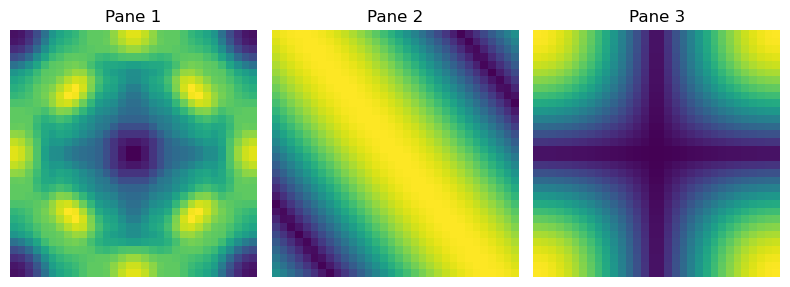

In [19]:
# Visualize a random sample input from the dataset
random_idx = np.random.randint(0, len(dataset))
random_input, random_output = dataset[random_idx]
input_shape = random_input.shape

fig, axes = plt.subplots(1, input_shape[0], figsize=(8, 8))
axes = axes.flatten()

for i in range(3):
    if i == 0:
        img = random_input[i].numpy()
    else:
        img = random_input[i].abs().numpy()
    axes[i].imshow(img, cmap='viridis')
    axes[i].set_title(f'Pane {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

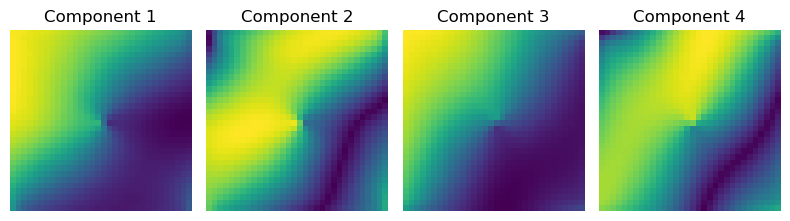

In [20]:
# Visualize a random sample output from the dataset
output_shape = random_output.shape

fig, axes = plt.subplots(1, output_shape[0], figsize=(8, 8))
axes = axes.flatten()

for i in range(4):
    if i % 2 == 0:
        img = random_output[i].numpy()
    else:
        img = random_output[i].abs().numpy()
    axes[i].imshow(img, cmap='viridis')
    axes[i].set_title(f'Component {i+1}')
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

In [21]:
# Print the shapes of the input and output data, train, test, and validation sets
print('Input data shape:', input_data.shape)
print('Output data shape:', output_data.shape)
print('Train data size:', len(train_dataset))
print('Test data size:', len(test_dataset))
print('Validation data size:', len(val_dataset))

# Inspect the first batch of data
for sample in train_loader:
    print('Batch shape:', sample[0].shape, sample[1].shape)
    #print(sample)
    break

Input data shape: torch.Size([1170000, 3, 32, 32])
Output data shape: torch.Size([1170000, 4, 32, 32])
Train data size: 877500
Test data size: 234000
Validation data size: 58500
Batch shape: torch.Size([256, 3, 32, 32]) torch.Size([256, 4, 32, 32])


In [33]:
class FourierNeuralOperator(nn.Module):
    def __init__(self, modes_height, modes_width, hidden_channels, in_channels=3, out_channels=4, num_layers=4):
        super(FourierNeuralOperator, self).__init__()
        self.modes_height = modes_height  # Number of Fourier modes in height dimension
        self.modes_width = modes_width  # Number of Fourier modes in width dimension
        self.hidden = hidden_channels  # Number of the hidden channels
        self.in_channels = in_channels  # Number of input channels
        self.out_channels = out_channels  # Number of output channels
        self.num_layers = num_layers
        self.precision = 'half'
        self.nonlinear = torch.nn.Tanh()
        self.stabilizer = None
        self.norm = None
        
        # FNO2d layer
        self.fno = FNO2d(n_modes_height=self.modes_height, n_modes_width=self.modes_width,hidden_channels=self.hidden, in_channels=self.in_channels, out_channels=self.out_channels,  num_layers=self.num_layers, fno_block_precision=self.precision, non_linearity=self.nonlinear, stabilizer=self.stabilizer, norm=self.norm)

    def forward(self, x):
        # Apply the FNO2d layer
        x = self.fno(x)
        return x

In [34]:
def train_one_epoch(model, loader, criterion, optimizer, device, epoch, report_freq=200, save_after_batch=False, save_path=None):
    model.train()
    running_loss = 0.0
    total_batches = len(loader)
    progress_bar = tqdm(enumerate(loader), total=total_batches, desc=f"Epoch {epoch + 1}")

    for batch_idx, (inputs, targets) in progress_bar:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets).mean()  # Ensure the loss is a scalar
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

        # Print progress for each batch
        if (batch_idx + 1) % report_freq == 0 or (batch_idx + 1) == total_batches:
            progress_bar.set_postfix(batch_loss=loss.item())

        # Save model weights after each batch if the flag is set
        if save_after_batch and save_path:
            save_model(model, save_path)

    epoch_loss = running_loss / len(loader.dataset)

    # Save model weights after each epoch if the flag is not set
    if not save_after_batch and save_path:
        save_model(model, save_path)

    return epoch_loss

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in tqdm(loader, desc="Evaluating"):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets).mean()  # Ensure the loss is a scalar
            running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(loader.dataset)
    return epoch_loss

# Function to save the model weights
def save_model(model, file_path):
    torch.save(model.state_dict(), file_path)

# Function to load the model weights
def load_model(model, file_path):
    model.load_state_dict(torch.load(file_path))

In [35]:
def plot_sample(data, title, labels, shared_colorbar=False, vmin=None, vmax=None, layout=None, save=False, save_path='plot.png'):
    # Automatically select layout based on the number of data arrays if not provided
    num_arrays = data.shape[0]
    if layout is None:
        if num_arrays == 3:
            layout = (1, 3)
        elif num_arrays == 4:
            layout = (2, 2)
        else:
            raise ValueError("Data input must have 3 or 4 arrays for plotting.")

    # Adjust figure size based on layout
    if layout == (1, 3):
        fig, axes = plt.subplots(*layout, figsize=(12, 4))  # Wide and short for 1x3 layout
    elif layout == (2, 2):
        fig, axes = plt.subplots(*layout, figsize=(8, 8))   # Square for 2x2 layout
    else:
        raise ValueError("Unsupported layout")

    for ax, (idx, label) in zip(axes.flatten(), labels):
        im = ax.imshow(data[idx, :, :].cpu(), cmap='viridis', vmin=vmin if shared_colorbar else None, vmax=vmax if shared_colorbar else None)
        ax.set_title(label)
        if not shared_colorbar:
            fig.colorbar(im, ax=ax)

    if shared_colorbar:
        # Add a single colorbar to the right of the plot
        cbar = fig.colorbar(im, ax=axes.ravel().tolist())
        cbar.ax.set_ylabel('Color scale')

    plt.suptitle(title)

    if save:
        # Save the figure
        plt.savefig(save_path)
        print(f"Plot saved at {save_path}")
        plt.close(fig)
    else:
        # Display the figure
        plt.show()

def plot_inputs(data, title, labels, save=False, save_path='example_plot.png'):
    # Plot inputs with layout (1, 3) and custom figure size
    plot_sample(data, title, labels, shared_colorbar=True, layout=(1, 3), save=save, save_path=save_path)

def plot_predictions_and_targets(inputs, outputs, targets, save=False, save_dir='figures/', file_suffix='example'):
    # Ensure save directory exists if save is True
    if save:
        os.makedirs(save_dir, exist_ok=True)

    # Add file_suffix to the filenames
    input_filename = f'{save_dir}/input_{file_suffix}.png'
    output_filename = f'{save_dir}/output_{file_suffix}.png'
    target_filename = f'{save_dir}/target_{file_suffix}.png'

    input_labels = [(0, 'geometry'), (1, 'waveform'), (2, 'band')]
    plot_inputs(inputs, 'Inputs', input_labels, save=save, save_path=input_filename)

    # Compute global min and max for shared colorbar between outputs and targets
    vmin = min(np.min(outputs.cpu().numpy()), np.min(targets.cpu().numpy()))
    vmax = max(np.max(outputs.cpu().numpy()), np.max(targets.cpu().numpy()))

    prediction_labels = [(0, 'eigenvector_x_real'), (1, 'eigenvector_x_imag'), (2, 'eigenvector_y_real'), (3, 'eigenvector_y_imag')]
    plot_sample(outputs, "Model Predictions", prediction_labels, shared_colorbar=True, vmin=vmin, vmax=vmax, save=save, save_path=output_filename)

    target_labels = [(0, 'eigenvector_x_real'), (1, 'eigenvector_x_imag'), (2, 'eigenvector_y_real'), (3, 'eigenvector_y_imag')]
    plot_sample(targets, "Target Values", target_labels, shared_colorbar=True, vmin=vmin, vmax=vmax, save=save, save_path=target_filename)



In [36]:
from torch.optim.lr_scheduler import ExponentialLR

hc = 64; lr = 1e-2; wd = 0; ss = 10; gamma = 0.1; decay_factor = 0.95
num_epochs = 20
max_grad_norm = 1.0  # Gradient clipping threshold

# model = FourierNeuralOperator(modes_height=design_res, modes_width=design_res, hidden_channels=hc, in_channels=3, out_channels=4).to(device)

# Define the loss function
criterion = nn.MSELoss()  # Mean Squared Error loss

# Define the optimizer
optimizer_list = [
    ('AdamW', optim.AdamW, {'lr': lr, 'weight_decay': wd}),
    ('RAdam', optim.RAdam, {'lr': lr, 'weight_decay': wd}),
    ('Adagrad', optim.Adagrad, {'lr': lr, 'weight_decay': wd}),
    # Adjusted RMSprop hyperparameters
    ('RMSprop', optim.RMSprop, {'lr': lr, 'alpha': 0.9, 'eps': 1e-8, 'weight_decay': wd}),
    # SGD with momentum
    #('SGD_with_momentum', optim.SGD, {'lr': lr, 'weight_decay': wd, 'momentum': 0.75})
]

# Initialize data structures to store losses
optimizer_losses = {name: {'train_losses': [], 'val_losses': []} for name, _, _ in optimizer_list}

In [37]:
# Parameters for saving/loading model weights
save_path = f'./model_weights_hc{hc}_lr{lr:.0e}_wd{wd:.0e}_ss{ss}_gamma{gamma:.0e}.pth'
print(save_path)
load_existing_model = False  # Set to True if you want to load an existing model

# Load the model weights if a valid file path is provided and the flag is set
if load_existing_model and os.path.isfile(save_path):
    load_model(model, save_path)
    print(f"Loaded model weights from {save_path}")

# Lists to store losses for plotting
train_losses = []
val_losses = []

./model_weights_hc64_lr1e-02_wd0e+00_ss10_gamma1e-01.pth



Training with optimizer: AdamW



Evaluating: 100%|██████████| 229/229 [00:07<00:00, 31.51it/s]


Optimizer: AdamW, Epoch 1/20, Training Loss: 0.5547, Validation Loss: 0.47985385


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 38.10it/s]


Optimizer: AdamW, Epoch 2/20, Training Loss: 0.4470, Validation Loss: 0.44566436


Evaluating: 100%|██████████| 229/229 [00:05<00:00, 38.27it/s]


Optimizer: AdamW, Epoch 3/20, Training Loss: 0.4206, Validation Loss: 0.42177913


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.41it/s]


Optimizer: AdamW, Epoch 4/20, Training Loss: 0.4054, Validation Loss: 0.41171791


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 35.43it/s]


Optimizer: AdamW, Epoch 5/20, Training Loss: 0.3939, Validation Loss: 0.39437030


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 34.09it/s]


Optimizer: AdamW, Epoch 6/20, Training Loss: 0.3852, Validation Loss: 0.39388489


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 35.71it/s]


Optimizer: AdamW, Epoch 7/20, Training Loss: 0.3767, Validation Loss: 0.38644911


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 35.31it/s]


Optimizer: AdamW, Epoch 8/20, Training Loss: 0.3702, Validation Loss: 0.37832470


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 34.88it/s]


Optimizer: AdamW, Epoch 9/20, Training Loss: 0.3634, Validation Loss: 0.37426400


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 33.58it/s]


Optimizer: AdamW, Epoch 10/20, Training Loss: 0.3575, Validation Loss: 0.36938353


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 35.28it/s]


Optimizer: AdamW, Epoch 11/20, Training Loss: 0.3516, Validation Loss: 0.36516532


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 33.28it/s]


Optimizer: AdamW, Epoch 12/20, Training Loss: 0.3450, Validation Loss: 0.35403570


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.09it/s]


Optimizer: AdamW, Epoch 13/20, Training Loss: 0.3403, Validation Loss: 0.34511688


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.49it/s]


Optimizer: AdamW, Epoch 14/20, Training Loss: 0.3345, Validation Loss: 0.34759593


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.53it/s]


Optimizer: AdamW, Epoch 15/20, Training Loss: 0.3295, Validation Loss: 0.33980726


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.69it/s]


Optimizer: AdamW, Epoch 16/20, Training Loss: 0.3245, Validation Loss: 0.33614624


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.70it/s]


Optimizer: AdamW, Epoch 17/20, Training Loss: 0.3188, Validation Loss: 0.33380132


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.67it/s]


Optimizer: AdamW, Epoch 18/20, Training Loss: 0.3159, Validation Loss: 0.33010198


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.77it/s]


Optimizer: AdamW, Epoch 19/20, Training Loss: 0.3117, Validation Loss: 0.33156861


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.76it/s]


Optimizer: AdamW, Epoch 20/20, Training Loss: 0.3073, Validation Loss: 0.32515838

Training with optimizer: RAdam



Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.93it/s]


Optimizer: RAdam, Epoch 1/20, Training Loss: 0.5707, Validation Loss: 0.50507334


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.91it/s]


Optimizer: RAdam, Epoch 2/20, Training Loss: 0.4869, Validation Loss: 0.48456254


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.84it/s]


Optimizer: RAdam, Epoch 3/20, Training Loss: 0.4702, Validation Loss: 0.47277006


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.01it/s]


Optimizer: RAdam, Epoch 4/20, Training Loss: 0.4631, Validation Loss: 0.46794694


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.03it/s]


Optimizer: RAdam, Epoch 5/20, Training Loss: 0.4579, Validation Loss: 0.46501994


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.03it/s]


Optimizer: RAdam, Epoch 6/20, Training Loss: 0.4520, Validation Loss: 0.45808154


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.93it/s]


Optimizer: RAdam, Epoch 7/20, Training Loss: 0.4470, Validation Loss: 0.45080717


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.57it/s]


Optimizer: RAdam, Epoch 8/20, Training Loss: 0.4420, Validation Loss: 0.44336500


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.51it/s]


Optimizer: RAdam, Epoch 9/20, Training Loss: 0.4366, Validation Loss: 0.43854962


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.45it/s]


Optimizer: RAdam, Epoch 10/20, Training Loss: 0.4314, Validation Loss: 0.43464711


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.82it/s]


Optimizer: RAdam, Epoch 11/20, Training Loss: 0.4256, Validation Loss: 0.43096679


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.03it/s]


Optimizer: RAdam, Epoch 12/20, Training Loss: 0.4207, Validation Loss: 0.42913720


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.11it/s]


Optimizer: RAdam, Epoch 13/20, Training Loss: 0.4154, Validation Loss: 0.41905633


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.19it/s]


Optimizer: RAdam, Epoch 14/20, Training Loss: 0.4106, Validation Loss: 0.41936004


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.55it/s]


Optimizer: RAdam, Epoch 15/20, Training Loss: 0.4054, Validation Loss: 0.41363526


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.83it/s]


Optimizer: RAdam, Epoch 16/20, Training Loss: 0.4009, Validation Loss: 0.41036114


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.84it/s]


Optimizer: RAdam, Epoch 17/20, Training Loss: 0.3957, Validation Loss: 0.40623989


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.95it/s]


Optimizer: RAdam, Epoch 18/20, Training Loss: 0.3909, Validation Loss: 0.40052172


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.82it/s]


Optimizer: RAdam, Epoch 19/20, Training Loss: 0.3870, Validation Loss: 0.40163234


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.11it/s]


Optimizer: RAdam, Epoch 20/20, Training Loss: 0.3830, Validation Loss: 0.39243504

Training with optimizer: Adagrad



Evaluating: 100%|██████████| 229/229 [00:06<00:00, 35.98it/s]


Optimizer: Adagrad, Epoch 1/20, Training Loss: 0.6451, Validation Loss: 0.57271525


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.01it/s]


Optimizer: Adagrad, Epoch 2/20, Training Loss: 0.5449, Validation Loss: 0.52833061


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.00it/s]


Optimizer: Adagrad, Epoch 3/20, Training Loss: 0.5123, Validation Loss: 0.50745829


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.19it/s]


Optimizer: Adagrad, Epoch 4/20, Training Loss: 0.4932, Validation Loss: 0.49530849


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.00it/s]


Optimizer: Adagrad, Epoch 5/20, Training Loss: 0.4799, Validation Loss: 0.48233355


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.02it/s]


Optimizer: Adagrad, Epoch 6/20, Training Loss: 0.4700, Validation Loss: 0.47490092


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.78it/s]


Optimizer: Adagrad, Epoch 7/20, Training Loss: 0.4622, Validation Loss: 0.46927870


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.64it/s]


Optimizer: Adagrad, Epoch 8/20, Training Loss: 0.4559, Validation Loss: 0.46400063


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.86it/s]


Optimizer: Adagrad, Epoch 9/20, Training Loss: 0.4507, Validation Loss: 0.45929003


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.05it/s]


Optimizer: Adagrad, Epoch 10/20, Training Loss: 0.4462, Validation Loss: 0.45609882


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.14it/s]


Optimizer: Adagrad, Epoch 11/20, Training Loss: 0.4424, Validation Loss: 0.45288102


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.05it/s]


Optimizer: Adagrad, Epoch 12/20, Training Loss: 0.4391, Validation Loss: 0.45086642


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.92it/s]


Optimizer: Adagrad, Epoch 13/20, Training Loss: 0.4361, Validation Loss: 0.44773095


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.28it/s]


Optimizer: Adagrad, Epoch 14/20, Training Loss: 0.4336, Validation Loss: 0.44670497


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.89it/s]


Optimizer: Adagrad, Epoch 15/20, Training Loss: 0.4313, Validation Loss: 0.44451053


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.97it/s]


Optimizer: Adagrad, Epoch 16/20, Training Loss: 0.4292, Validation Loss: 0.44250127


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.79it/s]


Optimizer: Adagrad, Epoch 17/20, Training Loss: 0.4274, Validation Loss: 0.44149213


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.89it/s]


Optimizer: Adagrad, Epoch 18/20, Training Loss: 0.4257, Validation Loss: 0.44026579


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.72it/s]


Optimizer: Adagrad, Epoch 19/20, Training Loss: 0.4242, Validation Loss: 0.43867041


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.50it/s]


Optimizer: Adagrad, Epoch 20/20, Training Loss: 0.4229, Validation Loss: 0.43749486

Training with optimizer: RMSprop



Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.47it/s]


Optimizer: RMSprop, Epoch 1/20, Training Loss: 2.6589, Validation Loss: 2.68908245


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.86it/s]


Optimizer: RMSprop, Epoch 2/20, Training Loss: 2.4871, Validation Loss: 2.33485985


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.90it/s]


Optimizer: RMSprop, Epoch 3/20, Training Loss: 2.3427, Validation Loss: 2.63062093


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.02it/s]


Optimizer: RMSprop, Epoch 4/20, Training Loss: 2.2126, Validation Loss: 2.23096604


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.94it/s]


Optimizer: RMSprop, Epoch 5/20, Training Loss: 2.0934, Validation Loss: 2.03320745


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.79it/s]


Optimizer: RMSprop, Epoch 6/20, Training Loss: 1.9870, Validation Loss: 1.84020633


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.77it/s]


Optimizer: RMSprop, Epoch 7/20, Training Loss: 1.8902, Validation Loss: 1.73124092


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.08it/s]


Optimizer: RMSprop, Epoch 8/20, Training Loss: 1.8029, Validation Loss: 1.84005766


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.92it/s]


Optimizer: RMSprop, Epoch 9/20, Training Loss: 1.7248, Validation Loss: 1.78565792


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 37.05it/s]


Optimizer: RMSprop, Epoch 10/20, Training Loss: 1.6542, Validation Loss: 1.57782552


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.87it/s]


Optimizer: RMSprop, Epoch 11/20, Training Loss: 1.5897, Validation Loss: 1.49673297


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.53it/s]


Optimizer: RMSprop, Epoch 12/20, Training Loss: 1.5315, Validation Loss: 1.45575230


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.71it/s]


Optimizer: RMSprop, Epoch 13/20, Training Loss: 1.4802, Validation Loss: 1.47867932


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.14it/s]


Optimizer: RMSprop, Epoch 14/20, Training Loss: 1.4331, Validation Loss: 1.48459576


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.20it/s]


Optimizer: RMSprop, Epoch 15/20, Training Loss: 1.3902, Validation Loss: 1.45934613


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.13it/s]


Optimizer: RMSprop, Epoch 16/20, Training Loss: 1.3528, Validation Loss: 1.37562913


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.18it/s]


Optimizer: RMSprop, Epoch 17/20, Training Loss: 1.3184, Validation Loss: 1.38706551


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.99it/s]


Optimizer: RMSprop, Epoch 18/20, Training Loss: 1.2864, Validation Loss: 1.29854845


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.72it/s]


Optimizer: RMSprop, Epoch 19/20, Training Loss: 1.2587, Validation Loss: 1.36228122


Evaluating: 100%|██████████| 229/229 [00:06<00:00, 36.81it/s]


Optimizer: RMSprop, Epoch 20/20, Training Loss: 1.2326, Validation Loss: 1.19619622


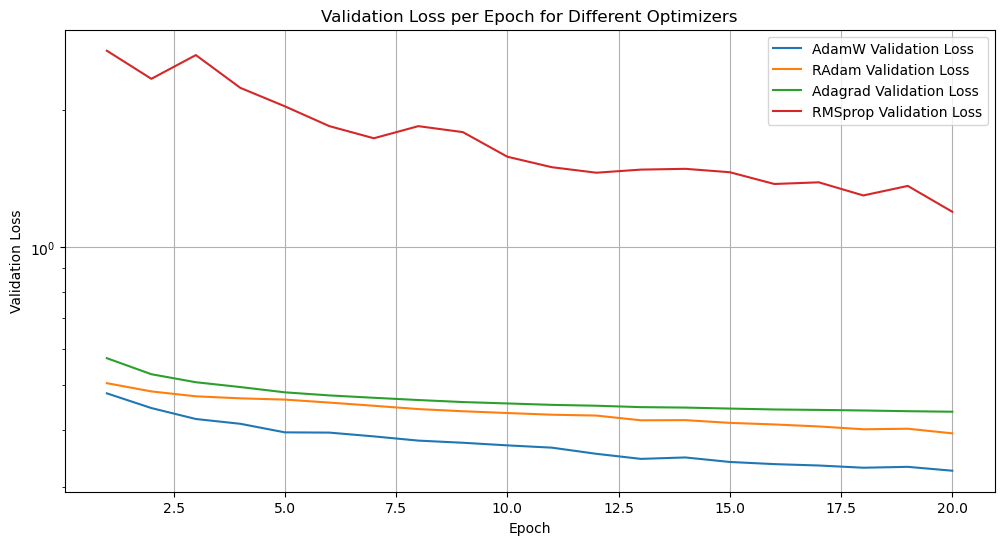

In [38]:
# Create a unique timestamp for the entire training session
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Main training loop for each optimizer
for opt_name, opt_class, opt_params in optimizer_list:
    print(f"\nTraining with optimizer: {opt_name}\n")

    # Reinitialize the model for each optimizer to ensure fresh start
    model = FourierNeuralOperator(modes_height=design_res, modes_width=design_res, hidden_channels=hc, in_channels=3, out_channels=4).to(device)

    # Define the loss function
    criterion = nn.MSELoss()  # Mean Squared Error loss

    # Instantiate the optimizer with the specific hyperparameters
    optimizer = opt_class(model.parameters(), **opt_params)

    # Define the scheduler for the optimizer
    scheduler = ExponentialLR(optimizer, gamma=decay_factor)
    
    # Gradient clipping
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
    
    # Create directory to save model weights and CSV data for this optimizer with timestamp
    save_path = f"./model_weights/{opt_name}_{timestamp}/"
    os.makedirs(save_path, exist_ok=True)

    # Retrieve optimizer hyperparameters for the file name
    hyperparam_str = "_".join([f"{k}={v}" for k, v in opt_params.items()])

    # Initialize CSV file for recording losses
    csv_file_path = os.path.join(save_path, f"{opt_name}_losses_{timestamp}.csv")
    with open(csv_file_path, mode='w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['Epoch', 'Training Loss', 'Validation Loss'])  # Write header

        # Training loop
        for epoch in range(num_epochs):
            train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device, epoch)
            val_loss = evaluate(model, val_loader, criterion, device)

            # Append losses for plotting
            optimizer_losses[opt_name]['train_losses'].append(train_loss)
            optimizer_losses[opt_name]['val_losses'].append(val_loss)

            # Save model weights at the end of each epoch
            epoch_save_path = os.path.join(
                save_path, f"{opt_name}_epoch_{epoch+1}_{hyperparam_str}.pt"
            )
            torch.save(model.state_dict(), epoch_save_path)

            # Write losses to CSV
            csv_writer.writerow([epoch + 1, train_loss, val_loss])

            # Print progress for each epoch
            print(f"Optimizer: {opt_name}, Epoch {epoch+1}/{num_epochs}, "
                  f"Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.8f}")

            # Step the scheduler
            scheduler.step()

# Plotting validation losses for all optimizers on a semi-logarithmic plot
plt.figure(figsize=(12, 6))
for opt_name in optimizer_losses:
    plt.plot(range(1, num_epochs + 1), optimizer_losses[opt_name]['val_losses'], label=f'{opt_name} Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.yscale('log')  # Set y-axis to log scale
plt.title('Validation Loss per Epoch for Different Optimizers')
plt.legend()
plt.grid(True)
plt.savefig(f'validation_loss_plot_{timestamp}.png')  # Save the plot
plt.show()

In [28]:
# Save the model weights at the end of training
# save_model(model, save_path)
save_path_posttraining = f'{save_path[:-4]}_e{len(train_losses)}.pth'
save_model(model, save_path_posttraining)
print(f"Saved model weights to {save_path_posttraining}")

Saved model weights to ./model_weights/RMSprop_20241114_141_e0.pth


In [29]:
# Load older model weights
# load_path = './model_weights_e101.pth'
# load_model(model, load_path)

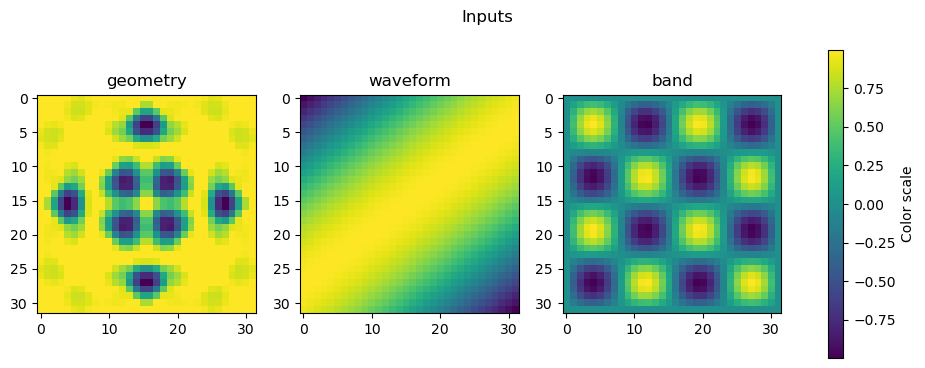

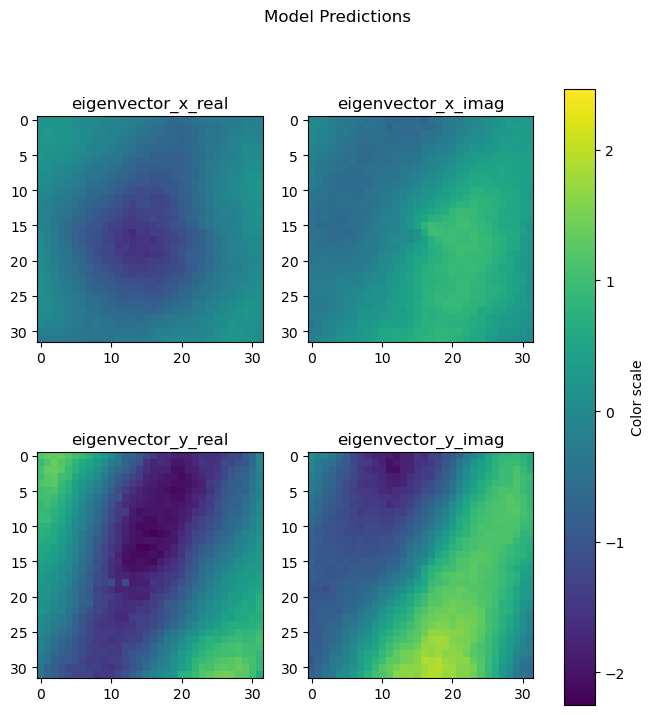

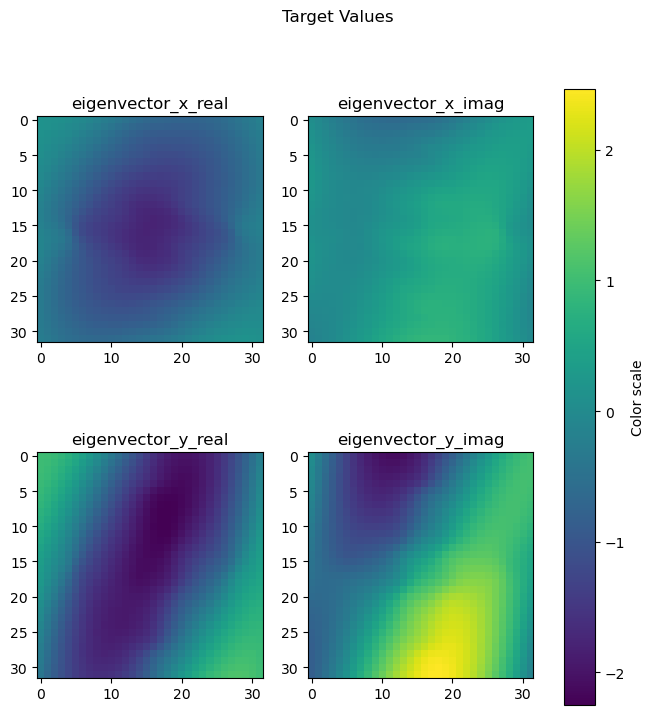

In [30]:
# Get a batch from the validation loader
inputs, targets = next(iter(val_loader))
inputs, targets = inputs.to(device), targets.to(device)

# Get a single sample from the batch
input_sample = inputs[1]
target_sample = targets[1]

# Run the model to get predictions
model.eval()
with torch.no_grad():
    output_sample = model(input_sample.unsqueeze(0)).squeeze(0)

# Plot the inputs, predictions, and targets
plot_predictions_and_targets(input_sample, output_sample, target_sample)


In [31]:
def save_sample_predictions(sample_num, interval, filename_suffix, file_path, model, val_loader, device, start_sample=0, plot_preview=False):
    # Ensure the directory exists, create if not
    os.makedirs(file_path, exist_ok=True)

    # Get a batch from the validation loader
    inputs, targets = next(iter(val_loader))
    inputs, targets = inputs.to(device), targets.to(device)

    # Loop through the samples based on sample_num
    for i in range(sample_num):
        # Calculate the current sample index based on start_sample and interval
        current_sample = start_sample + i * interval

        # Make sure the current sample index is within bounds
        if current_sample >= len(inputs):
            print(f"Sample index {current_sample} exceeds the number of available samples. Stopping loop.")
            break

        # Extract the current sample for inputs and targets
        input_sample = inputs[current_sample]
        target_sample = targets[current_sample]

        # Run the model to get predictions
        model.eval()
        with torch.no_grad():
            output_sample = model(input_sample.unsqueeze(0)).squeeze(0)

        # Generate the file suffix for this specific sample
        file_suffix = f'sample{i+1}_{filename_suffix}'

        # Plot and save the inputs, predictions, and targets using the new functionality
        plot_predictions_and_targets(
            input_sample,
            output_sample,
            target_sample,
            save=True,                   # Save the plots
            save_dir=file_path,           # Directory to save the plots
            file_suffix=file_suffix       # Suffix to make filenames unique
        )

        # Optionally preview the plots if plot_preview is True
        if plot_preview:
            plot_predictions_and_targets(
                input_sample,
                output_sample,
                target_sample,
                save=False                 # Only display the plots
            )

        print(f'Saved sample {i+1} with suffix {file_suffix} in {file_path}')


In [32]:
figure_folder = 'figures/hc128'
figure_suffix = f'hc{hc}_lr{lr:.0e}_wd{wd:.0e}_ss{ss}_gamma{gamma:.0e}'
save_sample_predictions(16, 8, figure_suffix, figure_folder, model, val_loader, device)


Plot saved at figures/hc128/input_sample1_hc64_lr1e-02_wd0e+00_ss10_gamma1e-01.png
Plot saved at figures/hc128/output_sample1_hc64_lr1e-02_wd0e+00_ss10_gamma1e-01.png
Plot saved at figures/hc128/target_sample1_hc64_lr1e-02_wd0e+00_ss10_gamma1e-01.png
Saved sample 1 with suffix sample1_hc64_lr1e-02_wd0e+00_ss10_gamma1e-01 in figures/hc128
Plot saved at figures/hc128/input_sample2_hc64_lr1e-02_wd0e+00_ss10_gamma1e-01.png
Plot saved at figures/hc128/output_sample2_hc64_lr1e-02_wd0e+00_ss10_gamma1e-01.png
Plot saved at figures/hc128/target_sample2_hc64_lr1e-02_wd0e+00_ss10_gamma1e-01.png
Saved sample 2 with suffix sample2_hc64_lr1e-02_wd0e+00_ss10_gamma1e-01 in figures/hc128
Plot saved at figures/hc128/input_sample3_hc64_lr1e-02_wd0e+00_ss10_gamma1e-01.png
Plot saved at figures/hc128/output_sample3_hc64_lr1e-02_wd0e+00_ss10_gamma1e-01.png
Plot saved at figures/hc128/target_sample3_hc64_lr1e-02_wd0e+00_ss10_gamma1e-01.png
Saved sample 3 with suffix sample3_hc64_lr1e-02_wd0e+00_ss10_gamma1e-